<a href="https://colab.research.google.com/github/lucywowen/csci191_ProgSci/blob/main/workshops/io_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Data from Multiple Files

As a final piece to processing our inflammation data, we need a way to get a list of all the files in our data directory whose names start with `inflammation-` and end with `.csv`. The following library will help us to achieve this:



In [1]:
import glob

Let's also load in all the inflammation files into Colab.  

In [2]:
from google.colab import files
files.upload()

Saving inflammation-01.csv to inflammation-01.csv
Saving inflammation-02.csv to inflammation-02.csv
Saving inflammation-03.csv to inflammation-03.csv
Saving inflammation-04.csv to inflammation-04.csv
Saving inflammation-05.csv to inflammation-05.csv
Saving inflammation-06.csv to inflammation-06.csv
Saving inflammation-07.csv to inflammation-07.csv
Saving inflammation-08.csv to inflammation-08.csv
Saving inflammation-09.csv to inflammation-09.csv
Saving inflammation-10.csv to inflammation-10.csv
Saving inflammation-11.csv to inflammation-11.csv
Saving inflammation-12.csv to inflammation-12.csv
Saving small-01.csv to small-01.csv
Saving small-02.csv to small-02.csv
Saving small-03.csv to small-03.csv


{'inflammation-01.csv': b'0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0\n0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1\n0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1\n0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1\n0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1\n0,0,1,2,2,4,2,1,6,4,7,6,6,9,9,15,4,16,18,12,12,5,18,9,5,3,10,3,12,7,8,4,7,3,5,4,4,3,2,1\n0,0,2,2,4,2,2,5,5,8,6,5,11,9,4,13,5,12,10,6,9,17,15,8,9,3,13,7,8,2,8,8,4,2,3,5,4,1,1,1\n0,0,1,2,3,1,2,3,5,3,7,8,8,5,10,9,15,11,18,19,20,8,5,13,15,10,6,10,6,7,4,9,3,5,2,5,3,2,2,1\n0,0,0,3,1,5,6,5,5,8,2,4,11,12,10,11,9,10,17,11,6,16,12,6,8,14,6,13,10,11,4,6,4,7,6,3,2,1,0,0\n0,1,1,2,1,3,5,3,5,8,6,8,12,5,13,6,13,8,16,8,18,15,16,14,12,7,3,8,9,11,2,5,4,5,1,4,1,2,0,0\n0,1,0,0,4,3,3,5,5,4,5,8,7,10,13,3,7,13,15,18,8,15,15,16,11,14,12,4,10,10,4,3,4

The `glob` library contains a function, also called `glob`, that finds files and directories whose names match a pattern. We provide those patterns as strings: the character `*` matches zero or more characters, while `?` matches any one character. We can use this to get the names of all the `.csv` files in the current directory:

In [3]:
print(glob.glob('inflammation*.csv'))

['inflammation-12.csv', 'inflammation-05.csv', 'inflammation-07.csv', 'inflammation-11.csv', 'inflammation-04.csv', 'inflammation-02.csv', 'inflammation-03.csv', 'inflammation-10.csv', 'inflammation-01.csv', 'inflammation-08.csv', 'inflammation-09.csv', 'inflammation-06.csv']


As these examples show, `glob.glob`’s result is a list of file and directory paths in arbitrary order. This means we can loop over it to do something with each filename in turn. In our case, the “something” we want to do is generate a set of plots for each file in our inflammation dataset.

If we want to start by analyzing just the first three files in alphabetical order, we can use the sorted built-in function to generate a new sorted list from the `glob.glob` output:

inflammation-01.csv


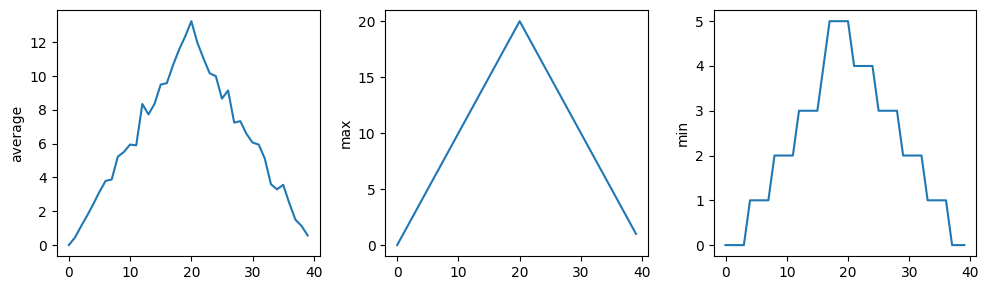

inflammation-02.csv


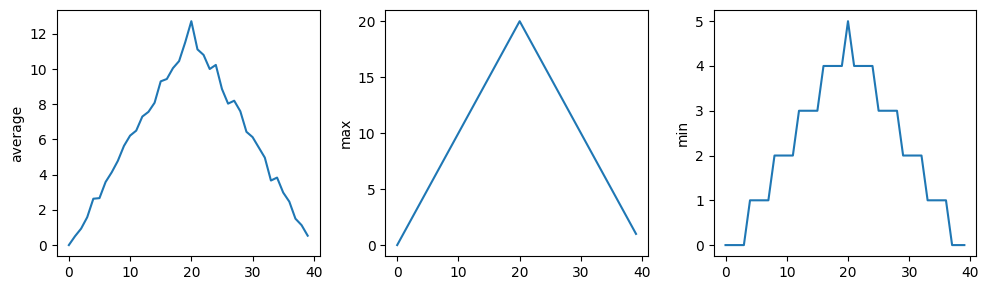

inflammation-03.csv


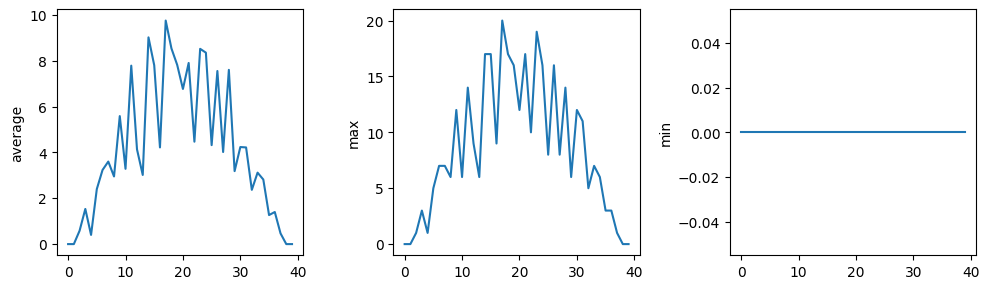

In [4]:
import glob
import numpy
import matplotlib.pyplot

filenames = sorted(glob.glob('inflammation*.csv'))
filenames = filenames[0:3]
for filename in filenames:
    print(filename)

    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(numpy.mean(data, axis=0))

    axes2.set_ylabel('max')
    axes2.plot(numpy.amax(data, axis=0))

    axes3.set_ylabel('min')
    axes3.plot(numpy.amin(data, axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

The plots generated for the second clinical trial file look very similar to the plots for the first file: their average plots show similar “noisy” rises and falls; their maxima plots show exactly the same linear rise and fall; and their minima plots show similar staircase structures.

The third dataset shows much noisier average and maxima plots that are far less suspicious than the first two datasets, however the minima plot shows that the third dataset minima is consistently zero across every day of the trial. If we produce a heat map for the third data file we see the following:

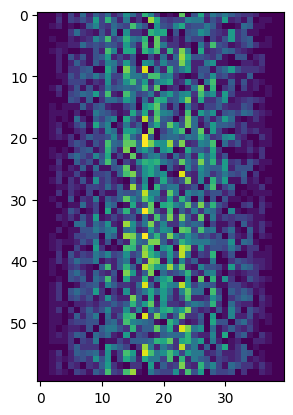

In [5]:
import matplotlib.pyplot
image = matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show()


We can see that there are zero values sporadically distributed across all patients and days of the clinical trial, suggesting that there were potential issues with data collection throughout the trial. In addition, we can see that the last patient in the study didn’t have any inflammation flare-ups at all throughout the trial, suggesting that they may not even suffer from arthritis!

### Try it!

Plot the difference between the average inflammations reported in the first and second datasets (stored in `inflammation-01.csv` and `inflammation-02.csv`, correspondingly), i.e., the difference between the leftmost plots of the first two figures.

In [7]:
### You're turn!

Use each of the files once to generate a dataset containing values averaged over all patients by completing the code inside the loop given below:

In [ ]:
filenames = glob.glob('inflammation*.csv')
composite_data = numpy.zeros((60, 40))
for filename in filenames:
    # sum each new file's data into composite_data as it's read
    #
# and then divide the composite_data by number of samples
composite_data = composite_data / len(filenames)

Then use pyplot to generate average, max, and min for all patients.

In [9]:
### You got this!

After spending some time investigating the heat map and statistical plots, as well as doing the above exercises to plot differences between datasets and to generate composite patient statistics, we gain some insight into the twelve clinical trial datasets.

The datasets appear to fall into two categories:

- seemingly “ideal” datasets that agree excellently with Dr. Maverick’s claims, but display suspicious maxima and minima (such as `inflammation-01.csv` and `inflammation-02.csv`)
- “noisy” datasets that somewhat agree with Dr. Maverick’s claims, but show concerning data collection issues such as sporadic missing values and even an unsuitable candidate making it into the clinical trial.


In fact, it appears that all three of the “noisy” datasets (`inflammation-03.csv`, `inflammation-08.csv`, and `inflammation-11.csv`) are identical down to the last value. Armed with this information, we confront Dr. Maverick about the suspicious data and duplicated files.

Dr. Maverick has admitted to fabricating the clinical data for their drug trial. They did this after discovering that the initial trial had several issues, including unreliable data recording and poor participant selection. In order to prove the efficacy of their drug, they created fake data. When asked for additional data, they attempted to generate more fake datasets, and also included the original poor-quality dataset several times in order to make the trials seem more realistic.

Congratulations! We’ve investigated the inflammation data and proven that the datasets have been synthetically generated.

But it would be a shame to throw away the synthetic datasets that have taught us so much already, so we’ll forgive the imaginary Dr. Maverick and continue to use the data to learn how to program.

### Key points:

- Use `glob.glob(pattern)` to create a list of files whose names match a pattern.
- Use `*` in a pattern to match zero or more characters, and `?` to match any single character.
